# ML Walkthrough — Simplified Datasets (Codespaces)
**Fully annotated • Teacher solutions • Edit points • Highlighted outputs**  
_Last updated: 2025-09-16 10:47_

Each model has a single, clearly marked **`# 👈 EDIT THIS`** line to change the input that is predicted.  
Below each result you’ll find **Explaining the output** (what the numbers mean + what “good” looks like) and a **Try it yourself** box.

## 0) One-time setup
In a Codespaces terminal:
```bash
python -m venv .venv
source .venv/bin/activate   # Windows PowerShell: .venv\Scripts\activate
pip install --upgrade pip
pip install -r requirements.txt
```
Then restart the kernel so Jupyter sees the packages.

## 1) Imports & versions

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (mean_absolute_error, r2_score, accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelSpreading
import joblib

print("NumPy", np.__version__)
print("Pandas", pd.__version__)
print("Matplotlib", plt.matplotlib.__version__)
%matplotlib inline

NumPy 2.3.3
Pandas 2.3.2
Matplotlib 3.10.6


## 2) Linear Regression — Study hours → Final mark

,hours,final_mark
0,0.5,35
1,1.0,40
2,2.0,45
3,2.5,50
4,3.0,55
5,4.0,62
6,4.5,66
7,5.0,70
8,6.0,75
9,7.0,82


Test MAE: 1.20 marks  |  R^2: 0.996
Slope (marks per extra hour): 6.711 | Intercept: 34.075


/workspaces/ml-walkthrough/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/workspaces/ml-walkthrough/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/workspaces/ml-walkthrough/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


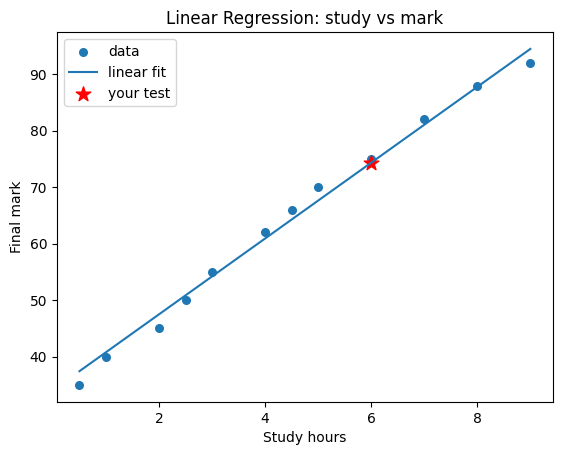

In [3]:
# STEP 1: PREPARE DATA (raw)
data_lin = pd.DataFrame({
    "hours": [0.5, 1, 2, 2.5, 3, 4, 4.5, 5, 6, 7, 8, 9],
    "final_mark": [35, 40, 45, 50, 55, 62, 66, 70, 75, 82, 88, 92],
})
display(data_lin)

X = data_lin[["hours"]]
y = data_lin["final_mark"]
Xtr_lin, Xte_lin, ytr_lin, yte_lin = train_test_split(X, y, test_size=0.25, random_state=42)

# STEP 2–3: BUILD + TRAIN
linreg = LinearRegression().fit(Xtr_lin, ytr_lin)

# STEP 4: EVALUATE
yhat_lin = linreg.predict(Xte_lin)
mae_lin = mean_absolute_error(yte_lin, yhat_lin)
r2_lin  = r2_score(yte_lin, yhat_lin)
print(f"Test MAE: {mae_lin:.2f} marks  |  R^2: {r2_lin:.3f}")
print(f"Slope (marks per extra hour): {linreg.coef_[0]:.3f} | Intercept: {linreg.intercept_:.3f}")

# STEP 5: OUTPUT — EDIT THIS LINE to change the hours we predict for
TEST_HOURS = 6   # 👈 EDIT THIS
pred_mark = linreg.predict(np.array([[TEST_HOURS]]))[0]

# Plot: data + fitted line + your test point
xx = np.linspace(X["hours"].min(), X["hours"].max(), 200).reshape(-1,1)
yy = linreg.predict(xx)
plt.figure()
plt.scatter(X["hours"], y, label="data", s=30)
plt.plot(xx[:,0], yy, label="linear fit")
plt.scatter([TEST_HOURS], [linreg.predict([[TEST_HOURS]])[0]], color="red", s=120, marker="*", label="your test")
plt.xlabel("Study hours"); plt.ylabel("Final mark"); plt.title("Linear Regression: study vs mark")
plt.legend(); plt.show()

display(HTML(f"<b>Prediction:</b> For "
             f"<span style='color:#d32f2f;font-weight:bold'>{TEST_HOURS} hours</span> "
             f"→ predicted final mark ≈ <span style='color:#d32f2f;font-weight:bold'>{pred_mark:.1f}</span>/100"))

### Explaining the output
- **MAE (Mean Absolute Error)**: average absolute difference between predictions and real marks  
  \[ \( \text{MAE} = \tfrac{1}{n}\sum_i |\hat y_i - y_i| \) \]  
  **Smaller is better.** Interpret in **marks** (the unit of \(y\)). A MAE of 3.0 means “about 3 marks off on average.”  
  Rule of thumb: compare MAE to the **range** or **typical size** of the target. MAE ≪ 10 marks is strong here.
- **R² (coefficient of determination)**: fraction of variance explained by the model  
  \[ \( R^2 = 1 - \frac{\sum (y-\hat y)^2}{\sum (y-\bar y)^2} \) \]  
  **Closer to 1 is better**; 0 means “no better than predicting the mean”; **negative** means “worse than the mean.”
- **Slope/Intercept**: line \( \hat y = m \cdot \text{hours} + b \). Slope \(m\) is “marks gained per extra hour.”

> A “good” result here: **low MAE** (small errors in marks) **and** **R² close to 1**.

> **Try it yourself**  
> • Change `TEST_HOURS` to 2, 6, 9 and watch the red star move and the predicted mark update.  
> • What happens to R²/MAE if you **remove** a couple of points or change the train/test split size?  
> • Extension: add a new feature (e.g., `sleep_hours`) and see if R² improves.

In [ ]:
# TEACHER SOLUTION
print("— Linear Regression: Teacher solution —")
m = linreg.coef_[0]; b = linreg.intercept_
print(f"Line: ŷ = {m:.3f}*hours + {b:.3f}")
print(f"MAE={mae_lin:.2f}, R²={r2_lin:.3f} → {r2_lin*100:.1f}% variance explained.")
print(f"For {TEST_HOURS} hours: {m:.3f}*{TEST_HOURS} + {b:.3f} = {pred_mark:.1f} marks.")

## 3) Polynomial Regression (degree=2) — Diminishing returns

Poly deg=2 → MAE: 0.76  |  R^2: 0.999


/workspaces/ml-walkthrough/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/workspaces/ml-walkthrough/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


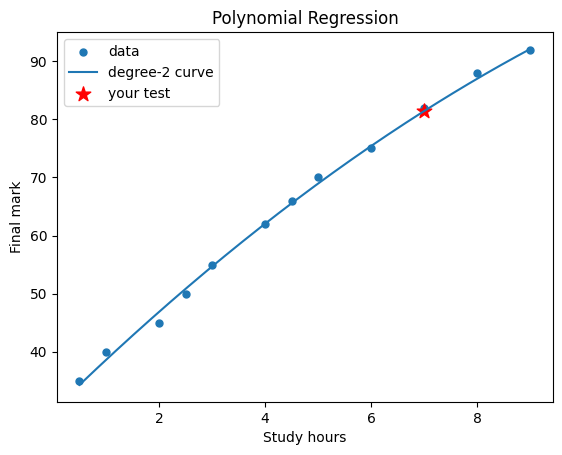

In [4]:
poly2 = Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)),
                  ("lin", LinearRegression())]).fit(Xtr_lin, ytr_lin)

yhat_poly = poly2.predict(Xte_lin)
mae_poly = mean_absolute_error(yte_lin, yhat_poly)
r2_poly  = r2_score(yte_lin, yhat_poly)
print(f"Poly deg=2 → MAE: {mae_poly:.2f}  |  R^2: {r2_poly:.3f}")

# EDIT THIS LINE to choose hours for polynomial prediction
TEST_HOURS_POLY = 7   # 👈 EDIT THIS
pred_mark_poly = poly2.predict(np.array([[TEST_HOURS_POLY]]))[0]

# Plot curve + your test
xx = np.linspace(X["hours"].min(), X["hours"].max(), 200).reshape(-1,1)
yy = poly2.predict(xx)
plt.figure()
plt.scatter(X["hours"], y, s=25, label="data")
plt.plot(xx[:,0], yy, label="degree-2 curve")
plt.scatter([TEST_HOURS_POLY], [pred_mark_poly], color="red", s=120, marker="*", label="your test")
plt.xlabel("Study hours"); plt.ylabel("Final mark"); plt.title("Polynomial Regression")
plt.legend(); plt.show()

display(HTML(f"<b>Polynomial prediction:</b> For "
             f"<span style='color:#d32f2f;font-weight:bold'>{TEST_HOURS_POLY} hours</span> "
             f"→ predicted final mark ≈ <span style='color:#d32f2f;font-weight:bold'>{pred_mark_poly:.1f}</span>/100"))

### Explaining the output
- **Why polynomial?** If marks increase but **flatten** at high hours, a straight line under/over-shoots.  
  Degree‑2 adds \( \text{hours}^2 \) so the fit can **curve**.
- **MAE/R² comparison**: if MAE is **lower** and R² is **higher** than the linear model, the curve fits better.  
  If not, the data may be mostly linear (or too little data to benefit).

> “Good” here = **lower MAE** and **higher R²** than the linear baseline without extreme wobbles (overfitting).

> **Try it yourself**  
> • Change `TEST_HOURS_POLY` to 3, 9. Does the curved prediction feel realistic?  
> • Extension: change degree in `PolynomialFeatures(degree=2)` to 3 or 4 and watch the line wiggle — discuss **overfitting**.

In [ ]:
# TEACHER SOLUTION
print("— Polynomial Regression: Teacher solution —")
print(f"Linear vs Poly → MAE {mae_lin:.2f} → {mae_poly:.2f} | R² {r2_lin:.3f} → {r2_poly:.3f}")

## 4) Logistic Regression — Pass (1) vs Fail (0) from study hours

Accuracy: 0.67

Classification report:
               precision    recall  f1-score   support

        fail       0.00      0.00      0.00         1
        pass       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/workspaces/ml-walkthrough/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/ml-walkthrough/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/ml-walkthrough/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

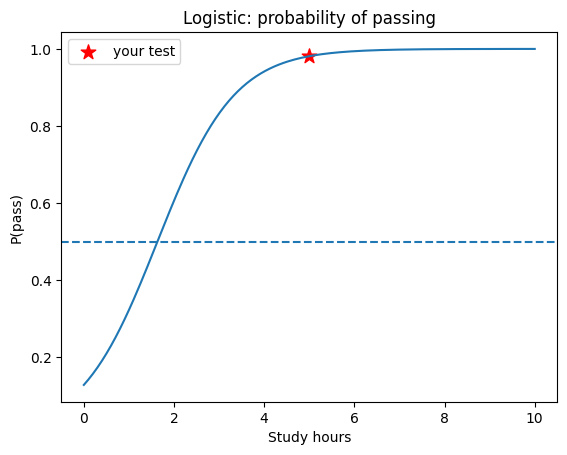

In [5]:
data_log = data_lin.copy()
data_log["pass"] = (data_log["final_mark"] >= 50).astype(int)
Xc = data_log[["hours"]]; yc = data_log["pass"]
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(Xc, yc, stratify=yc, test_size=0.25, random_state=42)

logreg = LogisticRegression().fit(Xc_tr, yc_tr)

yc_pred = logreg.predict(Xc_te)
acc_log = accuracy_score(yc_te, yc_pred)
print("Accuracy:", round(acc_log,2))
print("\nClassification report:\n", classification_report(yc_te, yc_pred, target_names=["fail","pass"]))

# EDIT THIS LINE to choose hours for probability prediction
TEST_HOURS_LOG = 5.0   # 👈 EDIT THIS
p_pass = logreg.predict_proba(np.array([[TEST_HOURS_LOG]]))[:,1][0]
label = "pass" if p_pass >= 0.5 else "fail"

# Probability curve + your test
xs = np.linspace(0, 10, 200).reshape(-1,1)
p_curve = logreg.predict_proba(xs)[:,1]
plt.figure(); plt.plot(xs[:,0], p_curve)
plt.axhline(0.5, ls="--"); plt.scatter([TEST_HOURS_LOG], [p_pass], color="red", s=120, marker="*", label="your test")
plt.xlabel("Study hours"); plt.ylabel("P(pass)"); plt.title("Logistic: probability of passing")
plt.legend(); plt.show()

display(HTML(f"<b>Probability:</b> At "
             f"<span style='color:#d32f2f;font-weight:bold'>{TEST_HOURS_LOG} hours</span> "
             f"→ P(pass) = <span style='color:#d32f2f;font-weight:bold'>{p_pass:.2f}</span> → label "
             f"<span style='color:#d32f2f;font-weight:bold'>{label}</span>"))

### Explaining the output
- **Accuracy**: proportion of correct pass/fail labels. **Higher is better**, but beware class imbalance.  
- **Precision** (for “pass”): when the model predicts **pass**, how often is it right?  
- **Recall** (for “pass”): of all true **pass** students, how many did we catch?  
- **F1**: harmonic mean of precision and recall (high only if **both** are high).
- **Probability curve**: logistic regression outputs \( P(\text{pass}|\,\text{hours}) \). The default **threshold** is 0.5, but in safety‑critical contexts you might choose 0.6/0.7 etc.

> “Good” here depends on priorities: if missing passes is worse, aim for **high recall**; if false passes are costly, aim for **high precision**.

> **Try it yourself**  
> • Change `TEST_HOURS_LOG` to 3, 6, 8 and see probability and label flip around the 0.5 line.  
> • Extension: compute accuracy at different **thresholds** by comparing `p_pass >= T` for several `T` values.

In [ ]:
# TEACHER SOLUTION
print("— Logistic Regression: Teacher solution —")
b0 = float(logreg.intercept_[0]); b1 = float(logreg.coef_[0,0])
print(f"z = {b1:.3f}*hours + {b0:.3f};  P(pass)=1/(1+e^-z)")
for h in [3,5,7]:
    p = logreg.predict_proba(np.array([[h]]))[:,1][0]
    print(f"hours={h} → P(pass)={p:.2f} → {'pass' if p>=0.5 else 'fail'}")

## 5) KNN — Fruit by weight & sweetness (3 classes)

,weight_g,sweetness,label
0,120,6,apple
1,130,7,apple
2,140,6,apple
3,150,8,orange
4,160,7,apple
5,170,9,orange
6,180,8,orange
7,190,10,orange
8,125,6,apple
9,135,7,apple


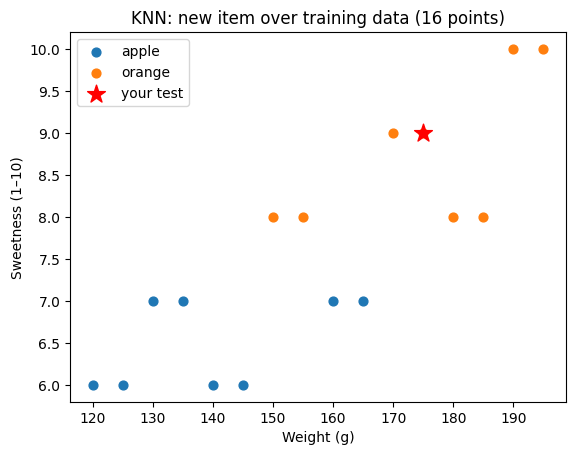

In [6]:

# Keep the explicit list-based dataset, but DOUBLE the number of unique data points (16 total).
fruit = pd.DataFrame({
    "weight_g":   [120, 130, 140, 150, 160, 170, 180, 190, 125, 135, 145, 155, 165, 175, 185, 195],
    "sweetness":  [  6,   7,   6,   8,   7,   9,   8,  10, 6,   7,   6,   8,   7,   9,   8,  10],
    "label":      ["apple","apple","apple","orange","apple","orange","orange","orange","apple","apple","apple","orange","apple","orange","orange","orange"]
})
display(fruit)

Xf = fruit[["weight_g","sweetness"]]
yf = fruit["label"]

knn = KNeighborsClassifier(n_neighbors=3).fit(Xf, yf)

# === EDIT THESE LINES to classify a single fruit example ===
TEST_WEIGHT = 175   # 👈 EDIT THIS
TEST_SWEET  = 9.0   # 👈 EDIT THIS
test_pt = pd.DataFrame({"weight_g":[TEST_WEIGHT], "sweetness":[TEST_SWEET]})
pred_knn = knn.predict(test_pt)[0]

# Plot training points and highlight your test
plt.figure()
for name, grp in fruit.groupby("label"):
    plt.scatter(grp["weight_g"], grp["sweetness"], label=name, s=40)
plt.scatter(TEST_WEIGHT, TEST_SWEET, color="red", marker="*", s=180, label="your test")
plt.xlabel("Weight (g)"); plt.ylabel("Sweetness (1–10)"); plt.title("KNN: new item over training data (16 points)")
plt.legend(); plt.show()

display(HTML(f"<b>KNN prediction:</b> For fruit with "
             f"weight_g=<span style='color:#d32f2f;font-weight:bold'>{TEST_WEIGHT}</span>, "
             f"sweetness=<span style='color:#d32f2f;font-weight:bold'>{TEST_SWEET}</span> "
             f"→ predicted type = <span style='color:#d32f2f;font-weight:bold'>{pred_knn}</span>"))


### Explaining the output
- KNN **doesn’t learn weights**; it stores training points and votes among the **k nearest**.  
- Sensible distances require **comparable scales** (grams vs a 1–10 scale → consider standardising in real projects).  
- **Choosing \(k\)**: small \(k\) can overfit (too noisy), large \(k\) can underfit (too smooth).

> “Good” behaviour: nearby test points should be classified like their neighbours; decisions should be stable to small input changes.

> **Try it yourself**  
> • Change `TEST_WEIGHT`/`TEST_SWEET` to move the red star across classes and watch the label change.  
> • Extension: change `n_neighbors=3` to 1 or 5 and see how predictions become more/less sensitive.

In [ ]:
# TEACHER SOLUTION
print("— KNN: Teacher solution —")
print("Decision depends on local neighbourhood; standardisation often needed with mixed units.")

## 6) Decision Tree — Phone purchase (Buy/Don’t Buy)

In [7]:
phones = pd.DataFrame({
    "memory_gb":            [64, 128, 256, 128, 256, 128, 256, 64],
    "ai_assistant":         [ 0,   1,   1,   0,   1,   0,   0,  1],
    "accessory_inclusions": [ 0,   0,   1,   1,   1,   0,   0,  0],
    "buy":                  [ 0,   1,   1,   0,   1,   0,   1,  0]
})
Xph = phones[["memory_gb","ai_assistant","accessory_inclusions"]]; yph = phones["buy"]
tree = DecisionTreeClassifier(max_depth=3, random_state=0).fit(Xph, yph)

print(export_text(tree, feature_names=list(Xph.columns)))

# EDIT THESE LINES to test a phone
TEST_MEM   = 128  # 👈 EDIT THIS
TEST_AI    = 1    # 👈 EDIT THIS (1=yes, 0=no)
TEST_ACC   = 0    # 👈 EDIT THIS (1=yes, 0=no)
ex_phone = pd.DataFrame({"memory_gb":[TEST_MEM], "ai_assistant":[TEST_AI], "accessory_inclusions":[TEST_ACC]})
pred_tree = int(tree.predict(ex_phone)[0])

display(HTML(f"<b>Decision:</b> For phone "
             f"(memory_gb=<span style='color:#d32f2f;font-weight:bold'>{TEST_MEM}</span>, "
             f"AI=<span style='color:#d32f2f;font-weight:bold'>{TEST_AI}</span>, "
             f"accessory=<span style='color:#d32f2f;font-weight:bold'>{TEST_ACC}</span>) "
             f"→ buy = <span style='color:#d32f2f;font-weight:bold'>{pred_tree}</span> (1=yes, 0=no)"))

|--- memory_gb <= 192.00
|   |--- ai_assistant <= 0.50
|   |   |--- class: 0
|   |--- ai_assistant >  0.50
|   |   |--- memory_gb <= 96.00
|   |   |   |--- class: 0
|   |   |--- memory_gb >  96.00
|   |   |   |--- class: 1
|--- memory_gb >  192.00
|   |--- class: 1



### Explaining the output
- Trees follow **if/else** splits until a **leaf** decision. The printed rules show the exact logic path.  
- **Feature importance** (not printed here) tells which inputs reduced impurity most.

> “Good” trees are **simple to read** (shallow depth) yet classify well; too deep → overfitting and hard to explain.

> **Try it yourself**  
> • Change `TEST_MEM`, `TEST_AI`, `TEST_ACC` and trace the path in the printed rules.  
> • Extension: increase `max_depth` to 4–5 and see how rules become more specific (risk: overfitting).

In [ ]:
# TEACHER SOLUTION
print("— Decision Tree: Teacher solution —")
fi = pd.Series(tree.feature_importances_, index=Xph.columns).sort_values(ascending=False)
print("Feature importances (sum=1):"); print(fi)

## 7) Neural Network (MLP) — Pass/Fail from study, attendance, assignment

Test accuracy: 1.0
That means it got about 100% of the test examples correct.


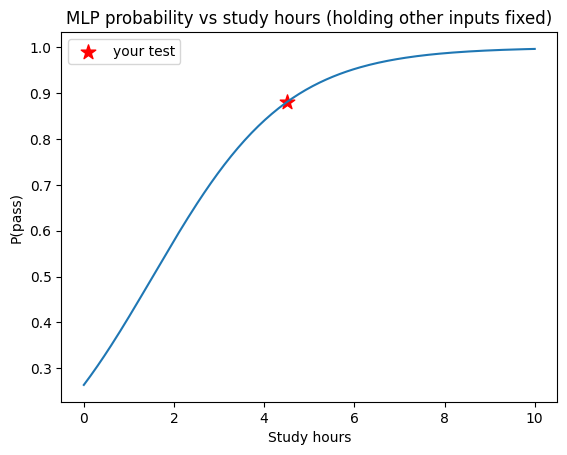

In [8]:

# Build a tiny, easy-to-read dataset (students will recognise these inputs)
# Each row is one student; columns are the things we know about them.
students = pd.DataFrame({
    "study_hours":      [1, 2, 3, 4, 5, 6, 2, 3, 5, 7, 8, 9],
    "attendance_rate":  [0.5,0.6,0.7,0.7,0.8,0.9,0.55,0.65,0.85,0.9,0.95,0.98],
    "assignment_score": [40, 45, 50, 60, 65, 70, 42, 55, 68, 78, 85, 90],
})
# Create the answer we want the model to learn: pass (1) or fail (0).
# Here we use a simple rule just for teaching: pass if assignment >= 50 AND attendance >= 0.65, else fail.
students["pass"] = ((students["assignment_score"]>=50) & (students["attendance_rate"]>=0.65)).astype(int)

# Split the columns into inputs (X) and answers (y).
Xnn = students[["study_hours","attendance_rate","assignment_score"]]
ynn = students["pass"]

# Split into a training set (the model learns from this) and a test set (we check if it learned well).
Xtr_nn, Xte_nn, ytr_nn, yte_nn = train_test_split(Xnn, ynn, test_size=0.33, random_state=42)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# --- BUILD THE MODEL (think: a small "brain" made of simple calculators in layers) ---
mlp = MLPClassifier(
    hidden_layer_sizes=(8,),  # 8 helper units in the middle layer (more units = can learn more complex patterns)
    activation='relu',        # ReLU: negative numbers become 0, positives pass through → helps learn curves quickly
    max_iter=2000,            # let it "practice" up to 2000 rounds so it has time to improve
    random_state=42           # fix randomness so results are repeatable for everyone in class
)

# --- TRAINING: learning happens here ---
# Show the model many examples (Xtr_nn) with the correct answers (ytr_nn).
# Inside, it tweaks internal numbers ("weights") little by little to make fewer mistakes.
mlp.fit(Xtr_nn, ytr_nn)

# --- PREDICTION: use what it learned on brand-new examples ---
# Ask the model for its best guess (0 = fail, 1 = pass) on the test set it hasn't seen before.
yp_nn = mlp.predict(Xte_nn)

# --- EVALUATION: how good were the guesses? ---
# Accuracy = (how many correct) / (how many total). Higher is better.
acc_nn = accuracy_score(yte_nn, yp_nn)

# Print a simple score we can all read. 0.92 means 92% correct.
print("Test accuracy:", round(acc_nn, 2))
print(f"That means it got about {acc_nn*100:.0f}% of the test examples correct.")

# ── TRY IT: make a single prediction you can edit ───────────────────────────────────────────
# Change these three lines to see how the prediction changes for one student:
TEST_STUDY = 4.5   # 👈 EDIT THIS (hours studied, try 2, 6, 9)
TEST_ATT   = 0.80  # 👈 EDIT THIS (attendance between 0 and 1, e.g., 0.6, 0.9)
TEST_ASSIGN= 66    # 👈 EDIT THIS (assignment score out of 100)

# Build a one-row table for that student and ask the model for its confidence (0 to 1) and label (0/1).
ex = pd.DataFrame({"study_hours":[TEST_STUDY], "attendance_rate":[TEST_ATT], "assignment_score":[TEST_ASSIGN]})
p_pass = mlp.predict_proba(ex)[0,1]  # number between 0 and 1: closer to 1 = more confident it's a 'pass'
label = int(p_pass>=0.5)             # turn probability into yes/no using the usual 0.5 threshold

# Show the personalised result in clear text with colour.
display(HTML(f"<b>MLP prediction:</b> For "
             f"study=<span style='color:#d32f2f;font-weight:bold'>{TEST_STUDY}</span>, "
             f"attendance=<span style='color:#d32f2f;font-weight:bold'>{TEST_ATT}</span>, "
             f"assignment=<span style='color:#d32f2f;font-weight:bold'>{TEST_ASSIGN}</span> "
             f"→ P(pass)=<span style='color:#d32f2f;font-weight:bold'>{p_pass:.2f}</span> → label "
             f"<span style='color:#d32f2f;font-weight:bold'>{label}</span>"))

# ── VISUALISE one factor at a time (optional): hold two inputs still, slide the third ───────
# Here we hold attendance and assignment fixed, and vary study hours from 0 → 10.
grid = pd.DataFrame({
    "study_hours": np.linspace(0,10,200),
    "attendance_rate": TEST_ATT,            # keep your chosen attendance
    "assignment_score": TEST_ASSIGN         # keep your chosen assignment score
})
probs = mlp.predict_proba(grid)[:,1]        # confidence of "pass" for each study_hours value
plt.figure(); plt.plot(grid["study_hours"], probs)
plt.scatter([TEST_STUDY], [p_pass], color="red", s=120, marker="*", label="your test")  # mark your chosen point
plt.xlabel("Study hours"); plt.ylabel("P(pass)")
plt.title("MLP probability vs study hours (holding other inputs fixed)")
plt.legend(); plt.show()

# Tips if accuracy looks low:
# • Give the model more data to practice on (more rows).
# • Try a slightly bigger network, e.g., hidden_layer_sizes=(16,) or (16,8).
# • Scale inputs (StandardScaler) in bigger projects so features are on similar ranges.
# • Check labels (pass/fail) are correct and not super imbalanced.


### Explaining the output
- The MLP maps inputs → hidden neurons (with **ReLU**) → output probability.  
- Training uses **backpropagation** to reduce classification error.  
- Accuracy here is a quick check; with more data you’d also monitor **validation curves** to avoid over/under‑fitting.

> “Good” practice: scale features (we kept it simple here), use validation, and set `random_state` for reproducibility.

> **Try it yourself**  
> • Change `TEST_STUDY`, `TEST_ATT`, `TEST_ASSIGN` to see how the probability shifts.  
> • Extension: increase `hidden_layer_sizes` (e.g., `(16,)` or `(16,8)`) and compare accuracy and curve shape.

In [ ]:
# TEACHER SOLUTION
print("— Neural Network: Teacher solution —")
print(f"With tiny datasets, accuracy fluctuates; emphasise process over absolute % here.")

## 8) Unsupervised — KMeans clustering (Maths & English) + predict for a new student

,maths,english,cluster
0,45,50,1
1,55,52,1
2,60,58,1
3,65,60,0
4,70,72,0
5,85,80,2
6,88,86,2
7,90,92,2
8,52,49,1
9,67,63,0


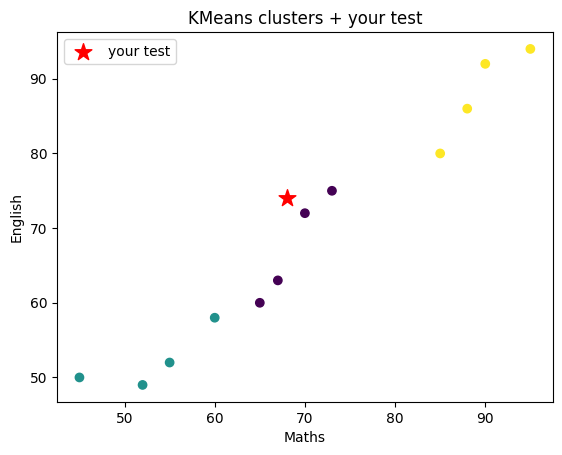

In [9]:
scores = pd.DataFrame({
    "maths":   [45, 55, 60, 65, 70, 85, 88, 90, 52, 67, 73, 95],
    "english": [50, 52, 58, 60, 72, 80, 86, 92, 49, 63, 75, 94],
})
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42).fit(scores)
scores["cluster"] = kmeans.labels_
display(scores)

# EDIT THESE LINES to test a new student
TEST_MATHS   = 68   # 👈 EDIT THIS
TEST_ENGLISH = 74   # 👈 EDIT THIS
new_student = pd.DataFrame({"maths":[TEST_MATHS], "english":[TEST_ENGLISH]})
pred_cluster = int(kmeans.predict(new_student)[0])

# Plot clusters + test point
plt.figure()
plt.scatter(scores["maths"], scores["english"], c=scores["cluster"])
plt.scatter([TEST_MATHS], [TEST_ENGLISH], color="red", marker="*", s=160, label="your test")
plt.xlabel("Maths"); plt.ylabel("English"); plt.title("KMeans clusters + your test")
plt.legend(); plt.show()

display(HTML(f"<b>Cluster prediction:</b> For student "
             f"(maths=<span style='color:#d32f2f;font-weight:bold'>{TEST_MATHS}</span>, "
             f"english=<span style='color:#d32f2f;font-weight:bold'>{TEST_ENGLISH}</span>) "
             f"→ cluster = <span style='color:#d32f2f;font-weight:bold'>{pred_cluster}</span>"))

### Explaining the output
- KMeans finds groups by minimising **within‑cluster variance** (no labels used).  
- **Cluster IDs are arbitrary** (0/1/2); focus on **centres** and how points group.  
- For separation quality you can compute **silhouette score** (0–1; higher is better) in larger lessons.

> “Good” clustering: compact, well‑separated groups; centres that make sense relative to the features.

> **Try it yourself**  
> • Change `TEST_MATHS`/`TEST_ENGLISH` to move the red star and see the assigned cluster.  
> • Extension: change `n_clusters=3` to 2 or 4 and discuss how the grouping changes.

In [ ]:
# TEACHER SOLUTION
print("— KMeans: Teacher solution —")
for i, c in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: maths≈{c[0]:.1f}, english≈{c[1]:.1f}")

## 9) Semi-supervised — LabelSpreading with partial labels + predict via classifier

In [ ]:
semi = pd.DataFrame({"hours": np.linspace(1,10,10)})
true_lbl = np.array([0,0,0,1,1,1,1,1,1,1])  # simple ground truth
partial = true_lbl.copy(); partial[3:] = -1  # only first 3 known

ls = LabelSpreading(kernel='rbf', alpha=0.2).fit(semi[["hours"]], partial)
filled = ls.transduction_

# Train a small classifier on the filled labels to predict any hours value
clf = LogisticRegression().fit(semi[["hours"]], filled)

# EDIT THIS LINE to choose hours for a prediction using the classifier trained on filled labels
TEST_HOURS_SEMI = 6.5   # 👈 EDIT THIS
p_pass = clf.predict_proba(np.array([[TEST_HOURS_SEMI]]))[:,1][0]
label = int(p_pass>=0.5)

# Plot filled labels + your test
plt.figure()
plt.scatter(semi["hours"], [0.02 if l==0 else 0.98 for l in filled], label="filled labels")
plt.scatter([TEST_HOURS_SEMI], [0.5], color="red", marker="*", s=160, label="your test (prob below)")
plt.yticks([0.02, 0.5, 0.98], ["fail", "your test", "pass"])
plt.xlabel("Hours"); plt.ylabel("Label / test marker"); plt.title("LabelSpreading → classifier")
plt.legend(); plt.show()

display(HTML(f"<b>Semi-supervised prediction:</b> At "
             f"<span style='color:#d32f2f;font-weight:bold'>{TEST_HOURS_SEMI} hours</span> "
             f"→ P(pass)=<span style='color:#d32f2f;font-weight:bold'>{p_pass:.2f}</span> → label "
             f"<span style='color:#d32f2f;font-weight:bold'>{label}</span>"))

### Explaining the output
- LabelSpreading **propagates** known labels to unlabeled points using feature similarity.  
- Training a small classifier afterwards lets us predict for **any** new input.  
- Be cautious: if early labels are wrong, propagation can **spread errors**.

> “Good” outcome: predictions that agree with a held‑out labelled subset when available.

> **Try it yourself**  
> • Change `TEST_HOURS_SEMI` to 3, 9 and see probabilities.  
> • Extension: alter which labels are initially known in `partial` and observe how the filled labels change.

In [ ]:
# TEACHER SOLUTION
print("— Semi-supervised: Teacher solution —")
agree = (filled == true_lbl).mean()
print(f"Filled-vs-true agreement: {agree:.2f}")

## 10) Reinforcement Learning — ε-greedy 3-path (with cumulative reward)

In [ ]:
import random
true_means = [0.3, 0.6, 0.8]

def pull(a): return 1.0 if random.random() < true_means[a] else 0.0

eps = 0.1
Q = [0.0, 0.0, 0.0]; N = [0,0,0]; rewards = []
for t in range(1, 801):
    a = random.randrange(3) if random.random() < eps else max(range(3), key=lambda i: Q[i])
    r = pull(a); rewards.append(r)
    N[a] += 1; Q[a] += (r - Q[a]) / N[a]

# EDIT THIS LINE to choose which action to inspect now
TEST_ACTION = 2   # 👈 EDIT THIS
est = Q[TEST_ACTION]

cum = np.cumsum(rewards)
plt.figure(); plt.plot(cum)
plt.xlabel("Steps"); plt.ylabel("Cumulative reward"); plt.title("ε-greedy learning"); plt.show()

display(HTML(f"<b>RL current estimate:</b> For action "
             f"<span style='color:#d32f2f;font-weight:bold'>{TEST_ACTION}</span> "
             f"→ Q = <span style='color:#d32f2f;font-weight:bold'>{est:.3f}</span> "
             f"(true means: {true_means})"))

### Explaining the output
- **ε‑greedy**: with probability ε **explore**, otherwise **exploit** the best‑estimated action.  
- **Cumulative reward** should rise faster as the agent identifies the best arm (0.8).  
- **Q estimates** approach the true means as each arm is sampled more.

> “Good” learning: the best arm’s **pull count** dominates; Q for that arm stabilises near its true mean.

> **Try it yourself**  
> • Change `TEST_ACTION` to 0/1/2 to view current estimates.  
> • Extension: set `eps = 0.01` or `0.3` and re‑run to compare exploration vs exploitation.

In [ ]:
# TEACHER SOLUTION
print("— RL: Teacher solution —")
print("Lower ε → faster exploitation but risk missing the best; higher ε → more exploration and slower convergence.")

## 11) Save & Load — Persist the fruit KNN pipeline and test an item

In [ ]:
# Train and save
fruit = pd.DataFrame({
    "weight_g":   [120, 130, 140, 150, 160, 170, 180, 190],
    "sweetness":  [  6,   7,   6,   8,   7,   9,   8,  10],
    "label":      ["apple","apple","apple","orange","apple","orange","orange","orange"]
})
Xf = fruit[["weight_g","sweetness"]]; yf = fruit["label"]
pipe = KNeighborsClassifier(n_neighbors=3).fit(Xf, yf)
joblib.dump(pipe, "/mnt/data/fruit_knn_pipeline.joblib")
loaded = joblib.load("/mnt/data/fruit_knn_pipeline.joblib")

# EDIT THESE LINES to test the saved model
TEST_WEIGHT_SAVED = 165  # 👈 EDIT THIS
TEST_SWEET_SAVED  = 8.0  # 👈 EDIT THIS

pred_saved = loaded.predict(pd.DataFrame({"weight_g":[TEST_WEIGHT_SAVED], "sweetness":[TEST_SWEET_SAVED]}))[0]
display(HTML(f"<b>Saved-model prediction:</b> For "
             f"weight_g=<span style='color:#d32f2f;font-weight:bold'>{TEST_WEIGHT_SAVED}</span>, "
             f"sweetness=<span style='color:#d32f2f;font-weight:bold'>{TEST_SWEET_SAVED}</span> "
             f"→ type = <span style='color:#d32f2f;font-weight:bold'>{pred_saved}</span>"))

### Explaining the output
- Saving lets you reuse a trained model later without retraining.  
- In bigger projects, save a **Pipeline** with preprocessing so steps are identical at inference time.

> **Try it yourself**  
> • Change `TEST_WEIGHT_SAVED`/`TEST_SWEET_SAVED` and confirm the saved model behaves like the live one.  
> • Extension: retrain with different training points and compare predictions after saving.

In [ ]:
# TEACHER SOLUTION
print("— Save/Load: Teacher solution —")
print("Joblib persists model parameters; use version control to track when/why models change.")